### Farid Abdalla & Noah Graells

# Exe 2 - Normal equations for linear regression

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pandas import ExcelWriter
from pandas import ExcelFile

%matplotlib inline

In [110]:
data = np.array(pd.read_excel('lausanne-appart.xlsx', sheet_names='lausanne-appart'))

x = data[:,0] # Area
y = data[:,2] # Rent price

### a) Normal equation

In [151]:
m = len(data)

x_bias = np.ones((m, 1))
x = np.reshape(x, (m,1))
X = np.append(x_bias, x, axis=1)

Xt = np.transpose(X)
Xt_dot_X = Xt.dot(X)

tmp_inv = np.linalg.inv(Xt_dot_X)
tmp_2 = Xt.dot(y)

theta = tmp_inv.dot(tmp_2)
print(theta)

[240.07710727  26.33242457]


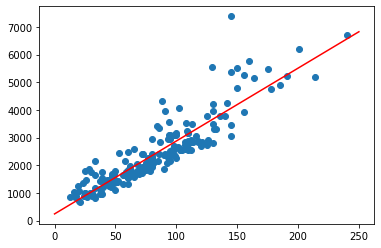

In [143]:
new_x = np.linspace(0, 250, 2)
new_y = theta[0] + new_x * theta[1] 

plt.scatter(x, y)
plt.plot(new_x, new_y, color='red')

### b) Overall cost

In [138]:
def j(theta, x, y, n):
    return np.sum(((theta[0] + x*theta[1]) - y)**2) / (2*n)

In [139]:
jt = j(theta, x, y, len(data))
print(jt)

276588446.5373535


In [140]:
start = int(theta[1]-10)
stop = int(theta[1]+10)

a = np.linspace(start, stop, 30)
b = [j(np.array([0, t]), x, y, len(data)) for t in a]

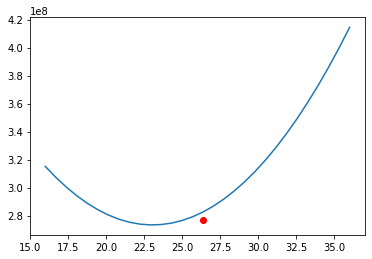

In [141]:
plt.plot(a,b)
plt.scatter(theta[1], jt, color='red')